In [5]:
from statsmodels.tsa.arima_process import ArmaProcess
import numpy as np
import matplotlib.pyplot as plt


In [15]:
def gen_arma_samples (ar,ma,nobs): 
    arma_model = ArmaProcess(ar=ar, ma=ma) # 모형 정의
    arma_samples = arma_model.generate_sample(nobs) # 샘플 생성
    return arma_samples
# drift가 있는 모형은 ArmaProcess에서 처리가 안 되어서 수동으로 정의해줘야 함
def gen_random_walk_w_drift(nobs,drift): 
    init = np.random.normal(size=1, loc = 0) 
    e = np.random.normal(size=nobs, scale =1) 
    y = np.zeros(nobs) 
    y[0] = init
    for t in (1,nobs): 
        y[t] = drift + 1 * y[t-1] + e[t] 
    return y



In [26]:
# AR 모형 실습
from statsmodels.tsa.arima_process import ArmaProcess

# ArmaProcess로 모형 생성하고 nobs 만큼 샘플 생성
def gen_arma_samples(ar,ma,nobs) :
    arma_model = ArmaProcess(ar=ar, ma=ma) # 모형 정의
    arma_samples = arma_model.generate_sample(nobs) # 샘플 생성
    return arma_samples

# drift가 있는 모형은 ArmaProcess에서 처리가 안 되어서 수동으로 정의해줘야 함
# drift → 절편 존재
def gen_random_walk_w_drift(nobs, drift) :
    init = np.random.normal(size=1, loc=0)
    e = np.random.normal(size=nobs, scale=1)
    y = np.zeros(nobs)
    y[0] = init
    for t in (1,nobs) :
        y[t] = drift + 1*y[t-1] + e[t]
        return y

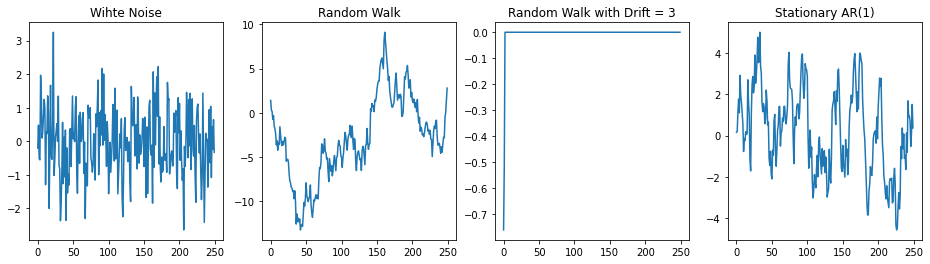

In [27]:
# 백색 잡음 모형, 임의 보행 모형, 표류가 있는 임의 보행 모형,
# 정상성을 만족하는 pi=0.9인 AR(1)모형을 각각 250개씩 샘플을 생성하여 그림
np.random.seed(12345)

white_noise = gen_arma_samples(ar=[1], ma=[1], nobs=250)
# y_t = epsilon_t
# y_{t-1} = 0  /  pi = 0, c = 0
random_walk = gen_arma_samples(ar=[1,-1], ma=[1], nobs=250)
# (1-L)y_t = epsilon_t
# y_t = Ly_{t-1}  /  타임랙 적용  /  ∴ (1-L)y_t = epsilon_t
random_walk_w_drift = gen_random_walk_w_drift(250,2)
# y_t = 2 + y_{t-1} + epsilon_t
# c, 즉 드리프트 적용함
stationary_ar_1 = gen_arma_samples(ar=[1,-0.9], ma=[1], nobs=250)
# (1 - 0,9L)y_t = epsilon_t
# -1 < pi < 1 인 y_t = c + pi_1*y_{t-1} + epsilon_t

fig, ax = plt.subplots(1,4)
ax[0].plot(white_noise)
ax[0].set_title("Wihte Noise", fontsize=12)

ax[1].plot(random_walk)
ax[1].set_title("Random Walk", fontsize=12)

ax[2].plot(random_walk_w_drift)
ax[2].set_title("Random Walk with Drift = 3")

ax[3].plot(stationary_ar_1)
ax[3].set_title("Stationary AR(1)")

fig.set_size_inches(16, 4)

plt.show()

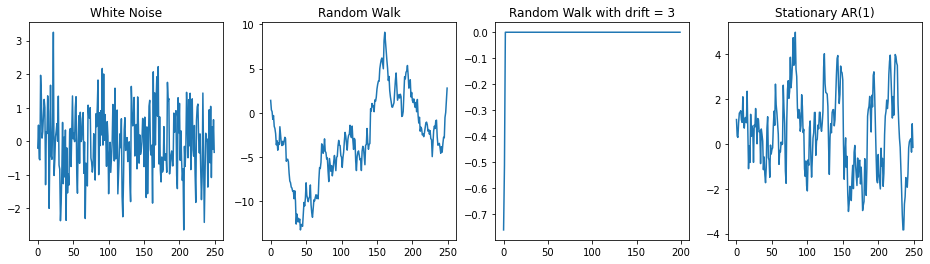

In [34]:
np.random.seed(12345)
white_noise= gen_arma_samples(ar = [1], ma = [1], nobs = 250) 
# y_t = epsilon_t
random_walk = gen_arma_samples(ar = [1,-1], ma = [1], nobs = 250) 
# (1 - L)y_t = epsilon_t
random_walk_w_drift = gen_random_walk_w_drift(200, 2) 
# y_t = 2 + y_{t-1} + epsilon_t
stationary_ar_1 = gen_arma_samples(ar = [1,-0.9], ma = [1],nobs=250) 
# (1 - 0.9L) y_t = epsilon_t
fig,ax = plt.subplots(1,4)
ax[0].plot(white_noise)
ax[0].set_title("White Noise")

ax[1].plot(random_walk)
ax[1].set_title("Random Walk")
ax[2].plot(random_walk_w_drift)
ax[2].set_title("Random Walk with drift = 3")
ax[3].plot(stationary_ar_1)
ax[3].set_title("Stationary AR(1)")
fig.set_size_inches(16,4)




plt.show()


In [18]:
ax[1].plot(random_walk)
ax[1].set_title("Random Walk")
ax[2].plot(random_walk_w_drift)
ax[2].set_title("Random Walk with drift = 3")
ax[3].plot(stationary_ar_1)
ax[3].set_title("Stationary AR(1)")
fig.set_size_inches(16,4)

NameError: name 'random_walk_w_drift' is not defined

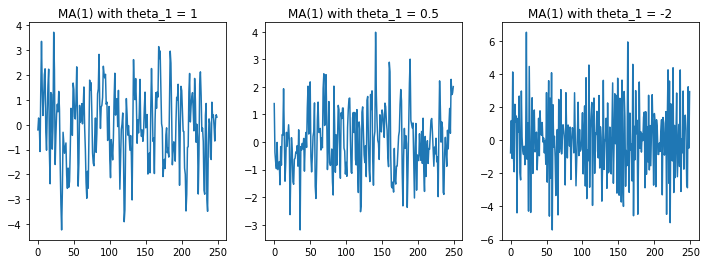

In [8]:
np.random.seed(12345)
ma_1 = gen_arma_samples(ar = [1], ma = [1,1], nobs = 250) # y_t = (1+L) epsilon_t
ma_2 = gen_arma_samples(ar = [1], ma = [1,0.5], nobs = 250) # y_t = (1+0.5L)epsilon_t
ma_3 = gen_arma_samples(ar = [1], ma = [1,-2], nobs = 250) # y_t = (1-2L) epsilon_t
fig,ax = plt.subplots(1,3, figsize = (12,4))
ax[0].plot(ma_1)
ax[0].set_title("MA(1) with theta_1 = 1")
ax[1].plot(ma_2)
ax[1].set_title("MA(1) with theta_1 = 0.5")
ax[2].plot(ma_3)
ax[2].set_title("MA(1) with theta_1 = -2")
plt.show()